Epidemic spreading on networks

In [1]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as random
random.seed(100) #set the random seed. Important to reproduce our results.

def momment_of_degree_distribution(G,m):
    M = 0
    N = len(G)
    for i in G.nodes():
        M = M + G.degree(i)**m
    M = M/N
    return M

In [2]:
# Network parameters
N = 500 #number of nodes
av_degree = 8 # average degree
p = float(av_degree)/float(N) #probability of connection in the ER model
m = int(av_degree/2) # number of nodes included at each time step in the BA model
kappa = av_degree # number of neighbors in the WS model

G = nx.barabasi_albert_graph(N,m) # generate a BA network

In [3]:
N = len(G) # Number of nodes
vk = dict(G.degree())
vk = list(vk.values())
print("Number of nodes:", N)
print("Average degree: ", mean(vk))

Number of nodes: 500
Average degree:  7.936


1. Simulation from a single seed node

1.1 SIR dynamics

In [4]:
# function to simulate the SIR dynamics starting from a single seed node
def SIR_single_seed(G, seed, beta=0.3, mu=1):    
    def find(v, i): # function to find the positions of element i in vector v
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l

    #Reactive process: SIR dynamics
    seed_node = seed; # seed node
    vector_states = np.zeros(N) # vector that stores the states of the vertices
    vector_states[seed_node] = 1 # vector that stores the states
    ninfected = 1
    t = 0 # start in t= 0 
    infected = list() # this list stores the infected nodes at each step
    vt = list() # this list stores the time step
    vI = list() # this list stores the fraction of infected nodes
    vR = list() # this list stores the fraction of recovered nodes
    vS = list() # this list stores the fraction of susceptible nodes
    # Reactive model simulation
    while ninfected > 0: # Simulate while we can find infected nodes
        infected = find(vector_states,1) # list of infected nodes
        for i in infected: # try to infect the neighbors
            neigs = G.neighbors(i)
            for j in neigs:
                if np.random.rand() < beta:
                    if(vector_states[j] != 2): # verify if the node is not recovered
                        vector_states[j] = 1
        for k in infected: # try to recover the infected nodes
            if np.random.rand() < mu:
                vector_states[k] = 2
        ninfected = len(find(vector_states,1))
        vI.append(ninfected/N)
        vR.append(len(find(vector_states,2))/N)
        vS.append(len(find(vector_states,0))/N)
        t = t + 1
        vt.append(t)
    return vI, vS, vR, vt

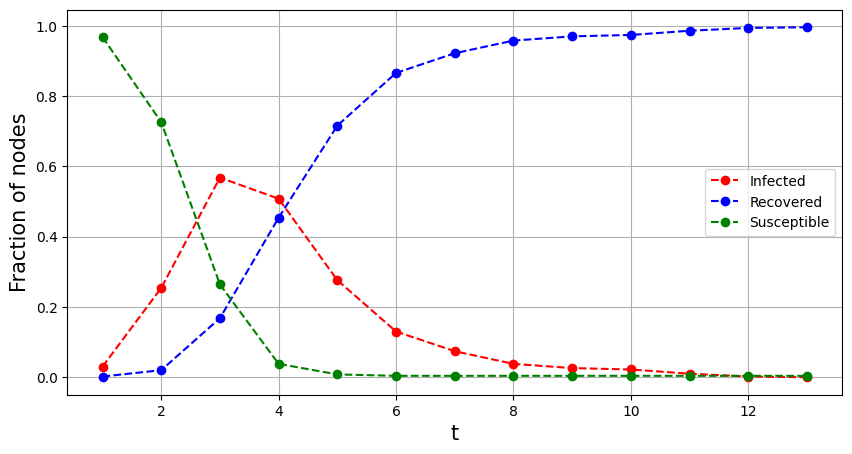

In [5]:
# Epidemic parameters
beta = 0.5 # Probability of infection
mu = 0.5  # Probability of recovering
seed = 0
vI, vS, vR, vt = SIR_single_seed(G, seed, beta, mu)
    
plt.figure(figsize=(10,5))
plt.plot(vt, vI, 'ro--', label='Infected')
plt.plot(vt, vR, 'bo--', label='Recovered')
plt.plot(vt, vS, 'go--', label='Susceptible')
plt.xlabel("t", fontsize=15)
plt.ylabel("Fraction of nodes", fontsize=15)
plt.legend()
plt.grid(True)
plt.show(True)

1.1 SIS dynamics

In [6]:
# a function to simulate the SIR dynamics starting in a single node
def SIS_single_seed(G, seed, beta=0.3, mu=1, Tmax = 50):    
    def find(v, i): # function to find the positions of element i in vector v
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l

    #Reactive process: SIS dynamics
    seed_node = 0; # seed node
    vector_states = np.zeros(N) # vector that stores the states of the vertices
    vector_states[seed_node] = 1 # vector that stores the states
    ninfected = 1
    infected = list() # Stores the number of infected nodes at each time step
    vt = list() #store the time step
    vI = list()
    vS = list()
    # Reactive model
    for t in arange(0, Tmax): # Simulate until a maximum number of steps Tmax
        infected = find(vector_states,1) # list of infected nodes
        for i in infected: # try to infect the neighbors
            neigs = G.neighbors(i)
            for j in neigs:
                if np.random.rand() < beta:
                    vector_states[j] = 1
        for k in infected: # try to recover the infected nodes
            if np.random.rand() < mu:
                vector_states[k] = 0
        ninfected = len(find(vector_states,1))
        vI.append(ninfected/N)
        vS.append(len(find(vector_states,0))/N)
        vt.append(t)
    return vS, vI, vt

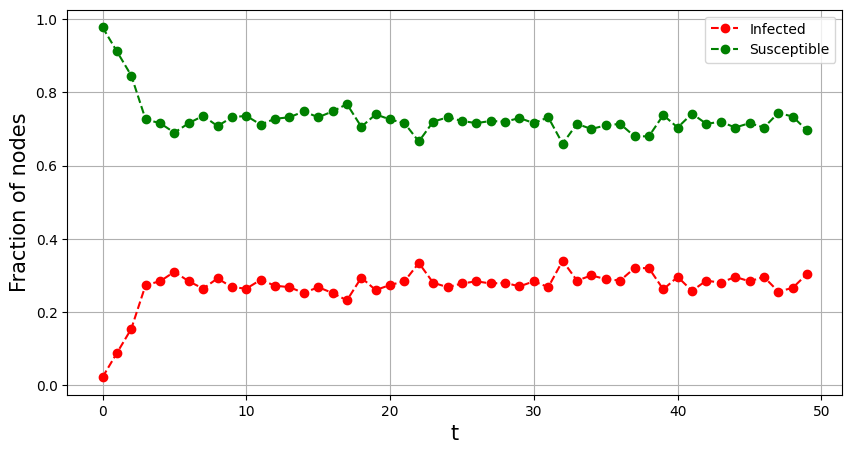

In [7]:
# Epidemic parameters
beta = 0.2 # Probability of infection
mu = 1  # Probability of recovering
seed = 0
vS, vI, vt = SIS_single_seed(G, seed, beta, mu)
    
plt.figure(figsize=(10,5))
plt.plot(vt, vI, 'ro--', label='Infected')
plt.plot(vt, vS, 'go--', label='Susceptible')
plt.xlabel("t", fontsize=15)
plt.ylabel("Fraction of nodes", fontsize=15)
plt.legend()
plt.grid(True)
plt.show(True)

2. Simulation from N nodes

In [8]:
# Network parameters
N = 100 #number of nodes
av_degree = 8 # average degree
p = float(av_degree)/float(N) #probability of connection in the ER model
m = int(av_degree/2) # number of added nodes in the BA model
kappa = av_degree # number of neighbors in the WS model\
G = nx.barabasi_albert_graph(N,m)

2.1 SIR dynamics

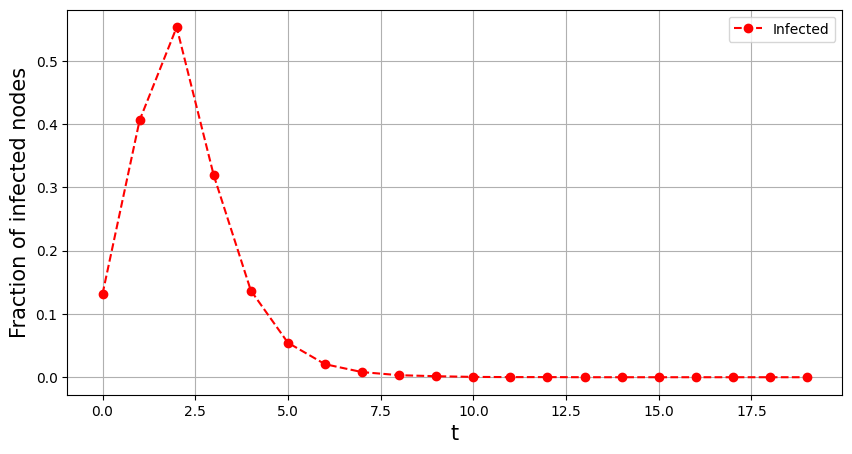

In [9]:
#Reactive process: SIR dynamics
mu = 0.6
beta = 0.5

Tmax = 20 #maximum number of steps
av_I = np.zeros(Tmax)
for seed_node in G.nodes():
    vI, vS, vR, vt = SIR_single_seed(G, seed, beta, mu)
    for x in arange(0, len(vI)):
        av_I[x] = av_I[x] + vI[x]

av_I = av_I/len(G.nodes())
vt = arange(0, Tmax)
plt.figure(figsize=(10,5))
plt.plot(vt, av_I, 'ro--', label='Infected')
plt.xlabel("t", fontsize=15)
plt.ylabel("Fraction of infected nodes", fontsize=15)
plt.legend()
plt.grid(True)
plt.show(True)         

2.1 SIS dynamics

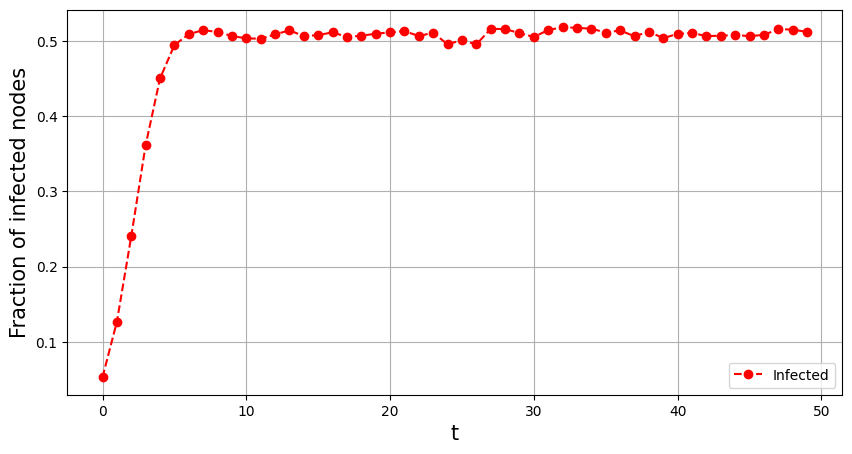

In [10]:
# Epidemic parameters
beta = 0.2 # Probability of infection
mu = 0.5  # Probability of recovering

Tmax = 50 #maximum number of steps
av_I = np.zeros(Tmax)
for seed_node in G.nodes():
    vS, vI, vt = SIS_single_seed(G, seed, beta, mu, Tmax)
    for x in arange(0, len(vI)):
        av_I[x] = av_I[x] + vI[x]

av_I = av_I/len(G.nodes())
vt = arange(0, Tmax)
plt.figure(figsize=(10,5))
plt.plot(vt, av_I, 'ro--', label='Infected')
plt.xlabel("t", fontsize=15)
plt.ylabel("Fraction of infected nodes", fontsize=15)
plt.legend()
plt.grid(True)
plt.show(True) 

3. Epidemic threshold 
$λ_c$

In [11]:
def SIS(G, mu=1, Tmax = 20):    
    def find(v, i): # function to find the positions of an element in a vector
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l

    vlbda = list()
    rhoI = list() # vector that stores the fraction of infected nodes according to the parameter lambda
    for lbd in arange(0,1, 0.05):
        beta = lbd*mu
        #Reactive process: SIS dynamics
        Tmax = 20 #maximum number of steps
        av_rho = np.zeros(Tmax)
        for seed_node in G.nodes():
            vector_states = np.zeros(N) # vector that stores the states of the vertices
            vector_states[seed_node] = 1 # vector that stores the states
            ninfected = 1
            infected = list() # Stores the number of infected nodes at each time step
            vrho = list()
            # Reactive model
            for t in arange(0, Tmax): # Simulate until a maximum number of steps Tmax
                infected = find(vector_states,1) # list of infected nodes
                for k in infected: # try to recover the infected nodes
                    if np.random.rand() < mu:
                        vector_states[k] = 0                
                for i in infected: # try to infect the neighbors
                    neigs = G.neighbors(i)
                    for j in neigs:
                        if np.random.rand() < beta:
                            vector_states[j] = 1

                ninfected = len(find(vector_states,1))
                vrho.append(ninfected/N)
            for x in arange(0, len(vrho)):
                av_rho[x] = av_rho[x] + vrho[x]
        av_rho = av_rho/len(G.nodes())
        rhoI.append(mean(av_rho[arange(int(0.8*Tmax), Tmax)]))
        vlbda.append(lbd)
        #print(lbd, mean(av_rho[arange(int(0.8*Tmax), Tmax)]))
    return vlbda, rhoI

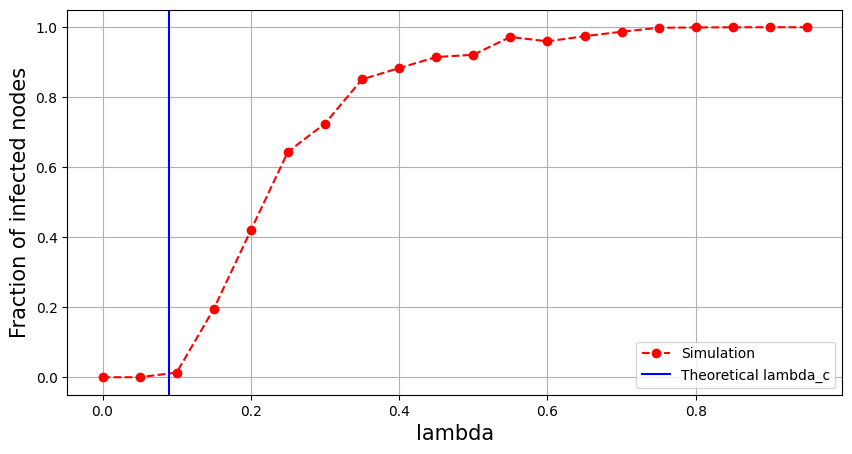

In [12]:
N = 100
av_degree = 8
p = av_degree/(N-1)
m = int(av_degree/2)
G = nx.barabasi_albert_graph(N, m)
#G = nx.gnp_random_graph(N, p, seed=None, directed=False)
lbda, rho  = SIS(G)
plt.figure(figsize=(10,5))
plt.plot(lbda, rho, 'ro--', label='Simulation')
plt.xlabel("lambda", fontsize=15)
plt.ylabel("Fraction of infected nodes", fontsize=15)

#the theoretical value of the critical threshold
lambda_c = momment_of_degree_distribution(G,1)/momment_of_degree_distribution(G,2)
plt.axvline(lambda_c, color = 'b', label='Theoretical lambda_c')
plt.legend()
plt.grid(True)
plt.show(True) 

In [13]:
def SIS_seeds(G, seeds, mu=1, Tmax = 20):    
    def find(v, i): # function to find the positions of an element in a vector
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l

    vlbda = list()
    rhoI = list() # vector that stores the fraction of infected nodes according to the parameter lambda
    for lbd in arange(0,1, 0.05):
        beta = lbd*mu
        #Reactive process: SIS dynamics
        Tmax = 20 #maximum number of steps
        av_rho = np.zeros(Tmax)
        for seed_node in seeds:
            vector_states = np.zeros(N) # vector that stores the states of the vertices
            vector_states[seed_node] = 1 # vector that stores the states
            ninfected = 1
            infected = list() # Stores the number of infected nodes at each time step
            vrho = list()
            # Reactive model
            for t in arange(0, Tmax): # Simulate until a maximum number of steps Tmax
                infected = find(vector_states,1) # list of infected nodes
                for i in infected: # try to infect the neighbors
                    neigs = G.neighbors(i)
                    for j in neigs:
                        if np.random.rand() < beta:
                            vector_states[j] = 1
                for k in infected: # try to recover the infected nodes
                    if np.random.rand() < mu:
                        vector_states[k] = 0
                ninfected = len(find(vector_states,1))
                vrho.append(ninfected/N)
            for x in arange(0, len(vrho)):
                av_rho[x] = av_rho[x] + vrho[x]
        av_rho = av_rho/len(seeds)
        rhoI.append(mean(av_rho[arange(int(0.8*Tmax), Tmax)]))
        vlbda.append(lbd)
        #print(lbd, mean(av_rho[arange(int(0.8*Tmax), Tmax)]))
    return vlbda, rhoI

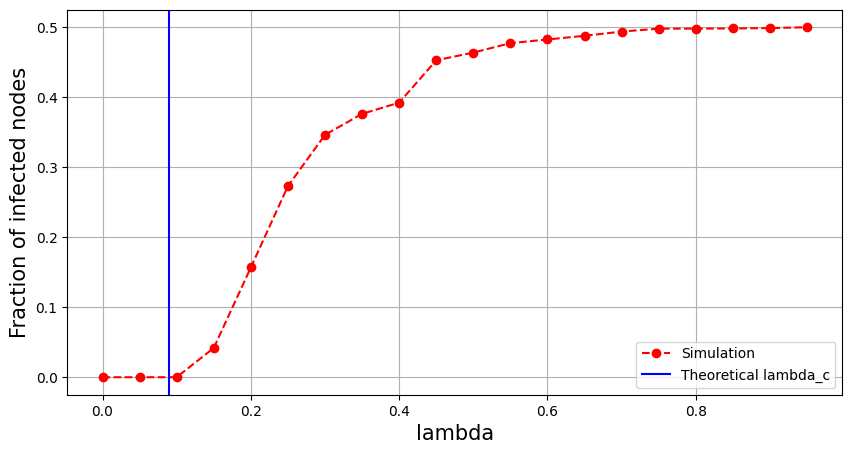

In [14]:
pinitial = 0.1; # percentage of initial seeds
seeds = np.random.choice(arange(0,N), round(pinitial*N)); # initial seeds
vlambda, vI  = SIS_seeds(G, seeds)
plt.figure(figsize=(10,5))
plt.plot(vlambda, vI, 'ro--', label='Simulation')
plt.xlabel("lambda", fontsize=15)
plt.ylabel("Fraction of infected nodes", fontsize=15)

#the theoretical value of the critical threshold
def momment_of_degree_distribution(G,m):
    M = 0
    N = len(G)
    for i in G.nodes():
        M = M + G.degree(i)**m
    M = M/N
    return M
lambda_c = momment_of_degree_distribution(G,1)/momment_of_degree_distribution(G,2)
plt.axvline(lambda_c, color = 'b', label='Theoretical lambda_c')
plt.legend()
plt.grid(True)
plt.show(True) 

Library: EON

In [15]:
# Network models
# Network parameters
N = 100 #number of nodes
av_degree = 8 # average degree
p = float(av_degree)/float(N) #probability of connection in the ER model
m = int(av_degree/2) # number of nodes included at each time step in the BA model
kappa = av_degree # number of neighbors in the WS model
#G = nx.barabasi_albert_graph(N,m) # generate a BA network
#G = nx.gnp_random_graph(N, p, seed=None, directed=False)
#G = nx.watts_strogatz_graph(N, kappa, p, seed=None)

# Real-world network
#G= nx.read_edgelist("data/polbooks.txt", nodetype=int, data=(('weight',float),)) # Read the network
G= nx.read_edgelist("data/lesmis.txt", nodetype=int, data=(('weight',float),)) # Read the network

G = G.to_undirected()
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
N = len(G) # Number of nodes

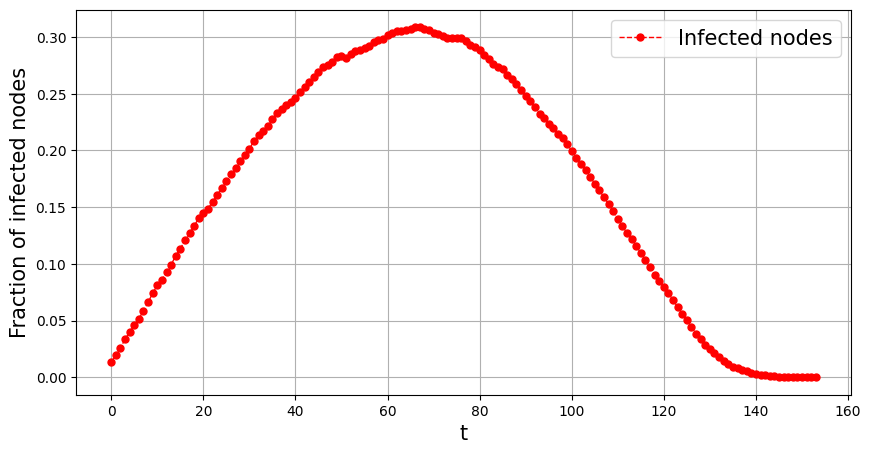

In [16]:
import EoN

#Epidemic spreading with time
mu = 0.5
#beta = (mu/main_eigenvalue)
beta = 0.6
rho = np.zeros(N)
#plt.figure()
Ns = 50

r_all= []
plt.figure(figsize=(10,5))
all_I = []
tmax = 0
for i in G.nodes():
    r = []
    for s in np.arange(0,Ns):        
        t, S, I, R = EoN.fast_SIR(G, beta, mu, initial_infecteds = i)
        r.append(R[-1])
        if(tmax < len(t)):
            tmax = len(t)
    r_all.append(r)
    rho[i] = np.mean(r)/len(G.nodes())
    all_I.append(I/N)

mI = np.zeros(tmax) # average over all curves
for i in range(0,len(all_I)):
    for j in range(0,len(all_I[i])):
        mI[j] = mI[j] + all_I[i][j]
mI = mI/len(all_I)
plt.plot(range(tmax), mI, color='red', linestyle='dashed',linewidth=1, marker='o',
         markersize=5,label = 'Infected nodes')
plt.xlabel("t", fontsize=15)
plt.ylabel("Fraction of infected nodes", fontsize=15)
plt.legend(fontsize = 15)
plt.grid(True)
plt.show(True)  

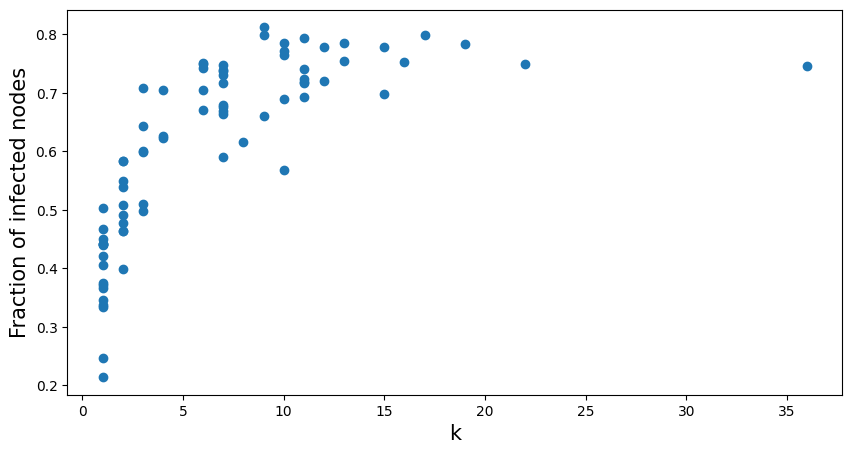

In [17]:
plt.figure(figsize=(10,5))
plt.plot(list(dict(G.degree).values()), rho, 'o')
plt.xlabel("k", fontsize=15)
plt.ylabel("Fraction of infected nodes", fontsize=15)
plt.show(True)

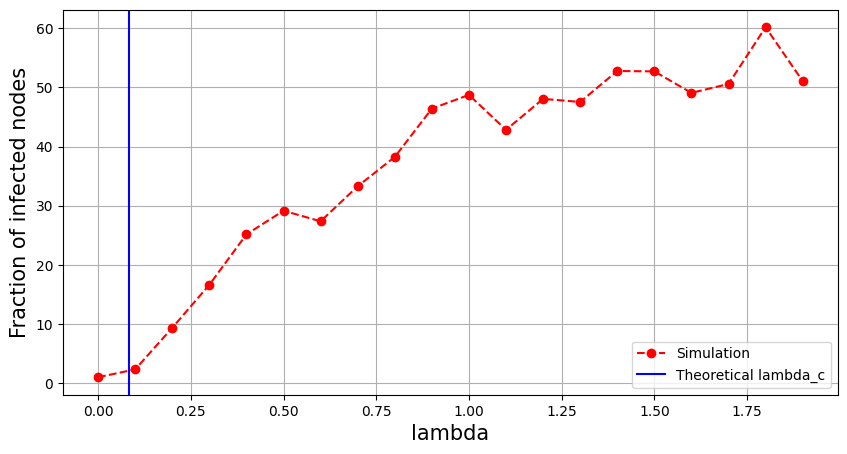

In [18]:
r_all = []
lbd = []
mu = .5
for beta in np.arange(0,1,0.05):
    r = []
    for i in range(0,N):
        t, S, I, R = EoN.fast_SIR(G, beta, mu, initial_infecteds = i)
        r.append(R[-1])
    r_all.append(np.mean(r))
    lbd.append(beta/mu)
    
plt.figure(figsize=(10,5))
plt.plot(lbd, r_all, 'ro--', label='Simulation')
plt.xlabel("lambda", fontsize=15)
plt.ylabel("Fraction of infected nodes", fontsize=15)
lambda_c = momment_of_degree_distribution(G,1)/momment_of_degree_distribution(G,2)
plt.axvline(lambda_c, color = 'b', label='Theoretical lambda_c')
plt.legend()
plt.grid(True)
plt.show(True) 

Gillespie algorithm

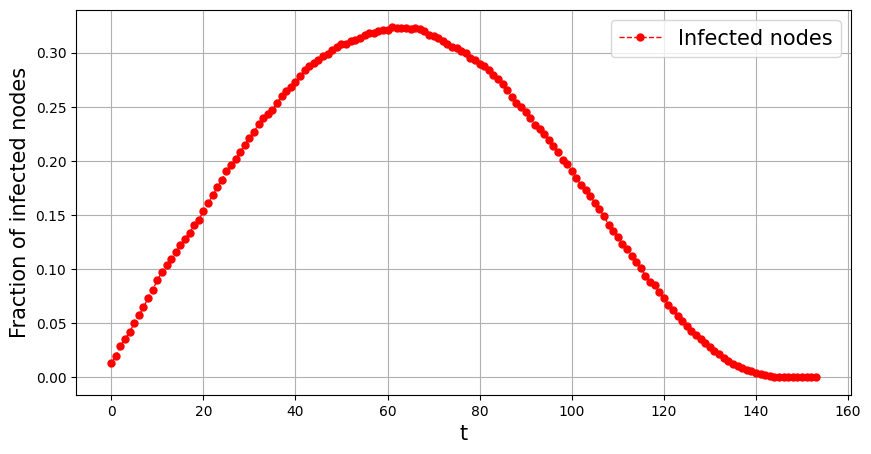

In [19]:
import EoN
import numpy as np

#Epidemic spreading with time
mu = 0.5
#beta = (mu/main_eigenvalue)
beta = 0.6
rho = np.zeros(N)
#plt.figure()
Ns = 50

r_all= []
plt.figure(figsize=(10,5))
all_I = []
tmax = 0
for i in G.nodes():
    r = []
    for s in np.arange(0,Ns):        
        t, S, I, R = EoN.Gillespie_SIR(G, beta, mu, initial_infecteds = i)
        r.append(R[-1])
        if(tmax < len(t)):
            tmax = len(t)
    r_all.append(r)
    rho[i] = np.mean(r)/len(G.nodes())
    all_I.append(I/N)

mI = np.zeros(tmax) # average over all curves
for i in range(0,len(all_I)):
    for j in range(0,len(all_I[i])):
        mI[j] = mI[j] + all_I[i][j]
mI = mI/len(all_I)
plt.plot(range(tmax), mI, color='red', linestyle='dashed',linewidth=1, marker='o',
         markersize=5,label = 'Infected nodes')
plt.xlabel("t", fontsize=15)
plt.ylabel("Fraction of infected nodes", fontsize=15)
plt.legend(fontsize = 15)
plt.grid(True)
plt.show(True)  


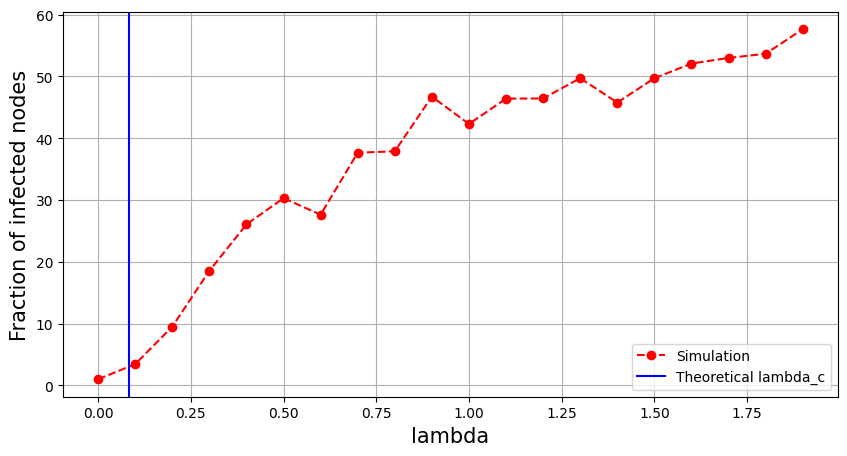

In [20]:
r_all = []
lbd = []
mu = .5
for beta in np.arange(0,1,0.05):
    r = []
    for i in range(0,N):
        t, S, I, R = EoN.Gillespie_SIR(G, beta, mu, initial_infecteds = i)
        r.append(R[-1])
    r_all.append(np.mean(r))
    lbd.append(beta/mu)
    
plt.figure(figsize=(10,5))
plt.plot(lbd, r_all, 'ro--', label='Simulation')
plt.xlabel("lambda", fontsize=15)
plt.ylabel("Fraction of infected nodes", fontsize=15)
lambda_c = momment_of_degree_distribution(G,1)/momment_of_degree_distribution(G,2)
plt.axvline(lambda_c, color = 'b', label='Theoretical lambda_c')
plt.legend()
plt.grid(True)
plt.show(True) 
